In [25]:
import scipy.optimize as opt
import numpy as np
 
f = lambda x: (x[0] - 2)**4 + (x[0] - 2)**2*x[1]**2 + (x[1]+1)**2
opts = dict(disp = True, maxiter=1e4)
# 1
# x[0] ,x[1] > 0
# cons = [{'type': 'ineq', 'fun': lambda x:  x[0]},\
        # {'type': 'ineq', 'fun': lambda x:  x[1]}]
# bnds = [(-np.inf, np.inf),(-np.inf, np.inf)]

# 2: approach 1
# cons = []
# bnds = [(None, 1), (None,2)]
# 2: approach 2
# cons = [{'type': 'ineq', 'fun': lambda x: 1 - x[0]}, {'type': 'ineq', 'fun': lambda x: 2 - x[1]}]
# bnds = [(-np.inf, np.inf),(-np.inf, np.inf)]
# 3
# cons = []
# bnds = [(0, 1), (0, 2)]
# 4
# cons = []
# bnds = [(0, np.inf), (-np.inf, 2)]
# 5
# cons = {'type': 'ineq', 'fun': lambda x:  -x[0] - x[1] + 0.9}
# bnds = bnds = [(-np.inf, np.inf),(-np.inf, np.inf)]
# 6: approach 1
# cons = [{'type': 'ineq', 'fun': lambda x:  
            # x[0] + x[1] - 1.5},
        # {'type': 'ineq', 'fun': lambda x:  
            # -x[0] - x[1] + 2}]
# bnds = bnds = [(-np.inf, np.inf),(-np.inf, np.inf)]          
# 6: approach 2
# A = [[1, 1], [-1, -1]]
# b = [-1.5, 2] 
# cons = {'type': 'ineq', 'fun': lambda x:  
#             A @ x + b}
# bnds = bnds = [(-np.inf, np.inf)),(-np.inf, np.inf)]
# 6: approach 3
# A = [1, 1]
# lb, ub = 1.5, 2
# cons = opt.LinearConstraint(A, lb, ub)
# bnds = bnds = [(-np.inf, np.inf),(-np.inf, np.inf)]
 
# 7: approach 1
# cons = {'type': 'ineq', 'fun': lambda x:  
            # 1 - np.sqrt(x[0]**2 + x[1]**2) }
# 7: approach 2
# con = lambda x:  np.sqrt(x[0]**2 + x[1]**2)
# lb, ub = 0, 1
# cons = opt.NonlinearConstraint(con, lb, ub)
# bnds = bnds = [(-np.inf, np.inf),(-np.inf, np.inf)]
# 8: 
cons = [{'type': 'ineq', 'fun': lambda x:  
            1 - np.sqrt(x[0]**2 + x[1]**2)},
        {'type': 'ineq', 'fun': lambda x:  
            x[0] * x[1]}]
bnds = bnds = [(-np.inf, np.inf),(-np.inf, np.inf)]
 
 
res = opt.minimize(f, x0=[2, 1], 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
# print(res)
print('x1 = {:.4f}, x2 = {:.4f}'.format(res.x[0], res.x[1]))
print('function value is {:.4f}'.format(res.fun))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.9999999999749616
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 6
x1 = 1.0000, x2 = -0.0000
function value is 2.0000


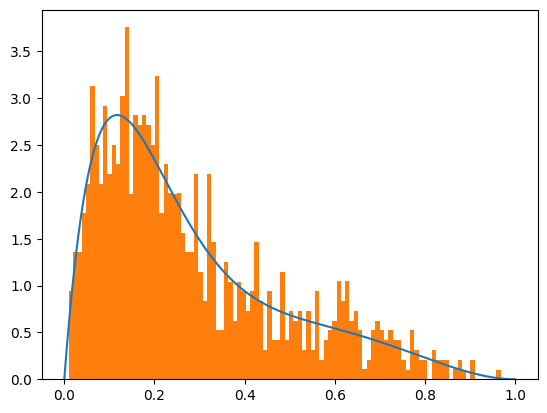

In [48]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np


n = 1000
a1,b1 = 2,9
a2,b2 = 3,3
p1 = 0.7
x = np.linspace(0,1,n) 
y = p1 * beta.pdf(x,a1,b1) + (1-p1) * beta.pdf(x,a2,b2)
plt.plot(x,y)

# 錯誤
# sample = beta.rvs(a1,b1,size=1000)
# sample = p1 * beta.rvs(a1,b1,size=n) + (1-p1) * beta.rvs(a2,b2,size=n)


n1 = int(n * p1)
n2 = n - n1
sample  =np.r_[beta.rvs(a1,b1,size=n1), beta.rvs(a2,b2,size=n2)]

plt.hist(sample, bins=100, density=True)
plt.show()

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -379.6914719720814
        x: [ 6.321e-01  2.009e+00  9.633e+00  2.465e+00  2.837e+00]
      nit: 36
      jac: [ 6.253e-03  7.390e-05  3.638e-04  3.126e-04 -1.370e-03]
     nfev: 240
     njev: 40
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


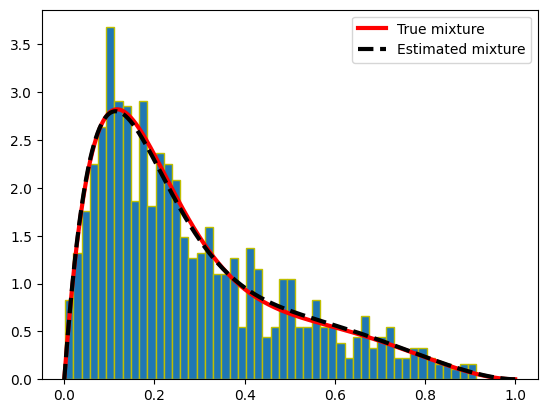

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
 
# set up the parameters --------------
pi1, a1, b1, a2, b2 = 0.7, 2, 9, 3, 3
# draw the mixture pdf ---------------
f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1-pi1) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)
plt.plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# generate the simulated sample -------
n = 1000
n1 = binom.rvs(n, pi1)
n2 = n - n1
sample = np.r_[beta.rvs(a1, b1, size = n1),
beta.rvs(a2, b2, size = n2)]
# plot histogram ------------------------
plt.hist(sample, 50, edgecolor = 'y', density = True)
# max mle (min -mle) --------------------
L = lambda x : -np.sum(np.log(x[0] * beta.pdf(sample, x[1], x[2]) + (1 - x[0]) * beta.pdf(sample, x[3], x[4])))
# the constraints, bounds and options
cons = []
bnds = [(0, 1), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]
opts = dict(disp = True, maxiter = 1e4)
x0 = [0.5, 1, 10, 5, 5] # initial guess
res = opt.minimize(L, x0 = x0, 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
# show the results and comapre to res.fun with population parameters
print(res)    
# print(L([pi1, a1, b1, a2, b2])) # the function value of the initial guess
# plot the estimated mixture pdf
f_hat = lambda x: res.x[0] * beta.pdf(x, res.x[1], res.x[2]) + (1-res.x[0]) * beta.pdf(x, res.x[3], res.x[4])
plt.plot(x, f_hat(x), color = 'k', linestyle = '--', \
    linewidth = 3, label = 'Estimated mixture')
plt.legend()
plt.show()

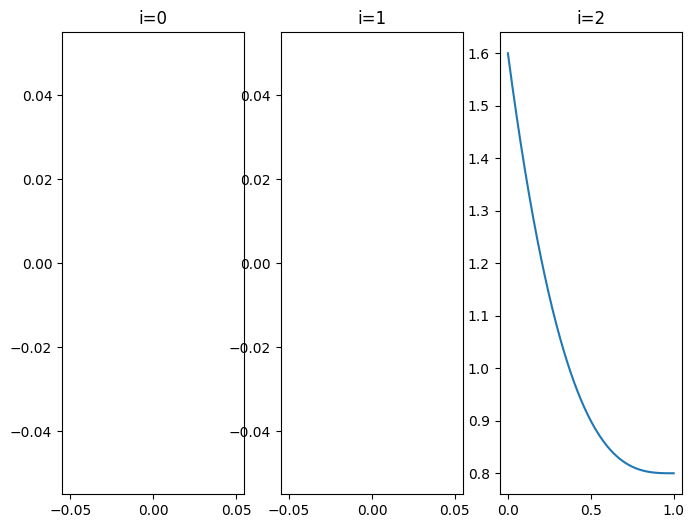

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta 

n = 1000
x = np.linspace(-3*np.pi, 3*np.pi, 100)
y = np.sin(x)
p1 = [0.5, 0.25, 0.8]
mu1 = [0,0,1]
mu2 = [2,3,1]
sigma1 = [1,1,1]
sigma2 = [1,1,4]

fig, axes = plt.subplots(1, 3, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    x = np.linspace(0,1,n)
    y = p1[i] * beta.pdf(x,mu1[i],sigma1[i]) + (1-p1[i]) * beta.pdf(x,mu2[i],sigma2[i]) 
    # y = p1 * beta.pdf(x,a1,b1) + (1-p1) * beta.pdf(x,a2,b2)
    ax.plot(x, y)
    ax.set_title('i={}'.format(i))
 
plt.show()

In [11]:
x = np.linspace(0,1,n)
y = p1[i] * beta.pdf(x,mu1[i],sigma1[i]) + (1-p1[i]) * beta.pdf(x,mu2[i],sigma2[i]) 
# y = p1 * beta.pdf(x,a1,b1) + (1-p1) * beta.pdf(x,a2,b2)
ax.plot(x, y)
plt.show()